# Mapping tracking data with R (and a bit of Python) in Colab 


(redeveloped from an R script also available here: https://www.dropbox.com/sh/5wd1fkwcompvsyr/AAAzQH3bOHDK-eCrUXaNTQkVa?dl=0)

# Setup

First we need to make sure the right version of rpy2 is installed.



In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=318375 sha256=5a29694ad748bdfec11f838fe2f45d6f64f9d815303892913bed7d50c07541c6
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


Then we can load the r2py extension to allow us to use R in Colab

In [ ]:
#%load_ext rpy2.ipython

%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

# Get Data

Download the tracking data to the colab environment

* We're downloading a CSV file from my dropbox using wget, we could also upload a file directly to map different data

In [ ]:
!wget -O Mres_TrackingData_2022.csv https://www.dropbox.com/s/8x1kvzkgd9rv2hi/Mres_TrackingData_2022.csv?dl=0

--2023-03-01 08:58:49--  https://www.dropbox.com/s/8x1kvzkgd9rv2hi/Mres_TrackingData_2022.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/8x1kvzkgd9rv2hi/Mres_TrackingData_2022.csv [following]
--2023-03-01 08:58:49--  https://www.dropbox.com/s/raw/8x1kvzkgd9rv2hi/Mres_TrackingData_2022.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc279007d17e13452ac555ea99d1.dl.dropboxusercontent.com/cd/0/inline/B3YK_VTewiF1crMwoEIZIoClBKNKmPs5wkkMAIxNONvvHh_GnEdsojNK6WWMSG6YsfE6bDv7hVH7npD8xjw4MgeBrNEtOpbgWx4C2eUqI5xARoEcsoKoACW8KO_r2D83O_dHj-tUhulYSpRAyk-xGV5CNyal7HuJSLg-jU3dN8IdjQ/file# [following]
--2023-03-01 08:58:50--  https://uc279007d17e13452ac555ea99d1.dl.dropboxusercontent.com/cd/0/inline/B3YK_VTewiF1crMwoEIZIoClBKNKmP

# Quick exploratory plot

Load the tracking data and make a quick plot of all the tracks..

**Remember to include '%%R' at the start of a chunk when we're using R code**

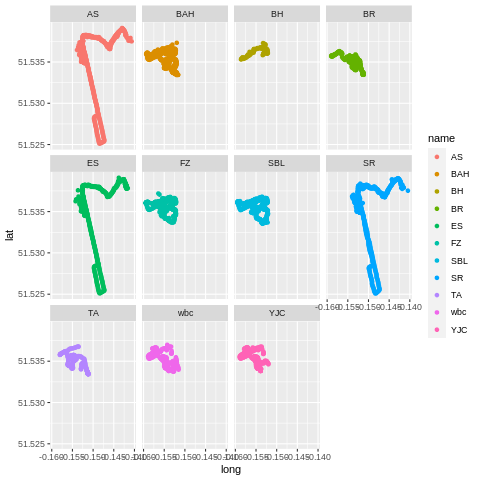

In [ ]:
%%R

dat <- read.csv("Mres_TrackingData_2022.csv", as.is=T)
#dat = subset(dat, name != "CL")

library(ggplot2)

# Quick plot of all tracks
ggplot(dat, aes(x=long, y=lat, group=name, color=name)) + 
  geom_point() + facet_wrap(~name)



# Explore the data

Let's have a quick look at the top of the dataframe

In [ ]:
%%R
head(dat)

  X filenumber                filename   group name gender index      lat
1 1          1 AS_RegPark_F_221201.GPX RegPark   AS      F     1 51.53528
2 2          1 AS_RegPark_F_221201.GPX RegPark   AS      F     2 51.53526
3 3          1 AS_RegPark_F_221201.GPX RegPark   AS      F     3 51.53522
4 4          1 AS_RegPark_F_221201.GPX RegPark   AS      F     4 51.53517
5 5          1 AS_RegPark_F_221201.GPX RegPark   AS      F     5 51.53518
6 6          1 AS_RegPark_F_221201.GPX RegPark   AS      F     6 51.53518
        long  alt  speed_ms distance_km                 time bng
1 -0.1522750 68.4        NA          NA 2022-12-01T11:15:02Z  NA
2 -0.1521516 57.6 0.8830042          NA 2022-12-01T11:15:12Z  NA
3 -0.1521000 53.9 0.6153070          NA 2022-12-01T11:15:22Z  NA
4 -0.1520850 52.9 0.4819424          NA 2022-12-01T11:15:33Z  NA
5 -0.1520466 43.5 0.3139814          NA 2022-12-01T11:15:43Z  NA
6 -0.1520233 34.4 0.1466724          NA 2022-12-01T11:15:54Z  NA
                           

In [ ]:
%%R 
summary(dat)

       X          filenumber       filename            group          
 Min.   :   1   Min.   : 1.000   Length:4521        Length:4521       
 1st Qu.:1131   1st Qu.: 5.000   Class :character   Class :character  
 Median :2261   Median : 8.000   Mode  :character   Mode  :character  
 Mean   :2261   Mean   : 7.485                                        
 3rd Qu.:3391   3rd Qu.:10.000                                        
 Max.   :4521   Max.   :13.000                                        
                                                                      
     name              gender              index            lat       
 Length:4521        Length:4521        Min.   :  1.0   Min.   :51.53  
 Class :character   Class :character   1st Qu.: 87.0   1st Qu.:51.53  
 Mode  :character   Mode  :character   Median :186.0   Median :51.54  
                                       Mean   :204.1   Mean   :51.54  
                                       3rd Qu.:303.0   3rd Qu.:51.54  
      

Which individuals do we have?

In [ ]:
%%R

unique(dat$name)

 [1] "AS"  "BH"  "BAH" "BR"  "ES"  "FZ"  "SBL" "SR"  "TA"  "wbc" "YJC"


Let's plot one of them...

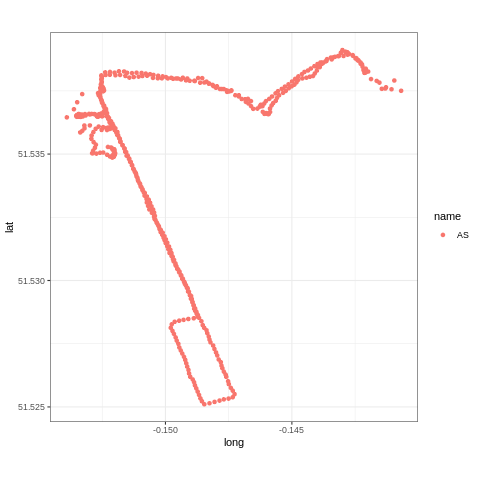

In [ ]:
%%R

one_individual = subset(dat, name == "AS")

library(ggplot2)

# Quick plot of all tracks
ggplot(one_individual, aes(x=long, y=lat, group=name, color=name)) + 
  geom_point() + 
  theme_bw() + 
  coord_equal()

# Speed

We can explore the speed of individuals, comparing males and females

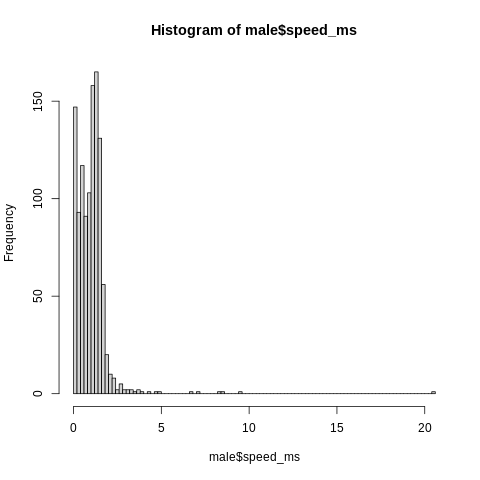

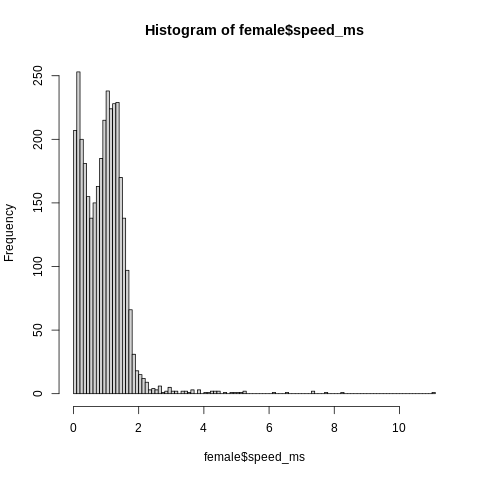

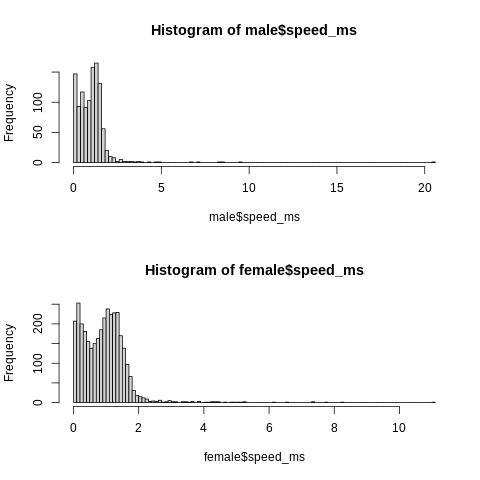

In [ ]:
%%R
# Subset data for females
female <- subset(dat, gender == "F")

# Subset data for males
male <- subset(dat, gender == "M")

# Summary stats
summary(female$speed_ms, na.rm = T)
summary(male$speed_ms, na.rm = T)

# Histograms
hist(male$speed_ms, 100)
hist(female$speed_ms, 100)
par(mfrow=c(2, 1))
hist(male$speed_ms, 100)
hist(female$speed_ms, 100)

These distributions are often very skewed and log-transforming may let us see the distribution better

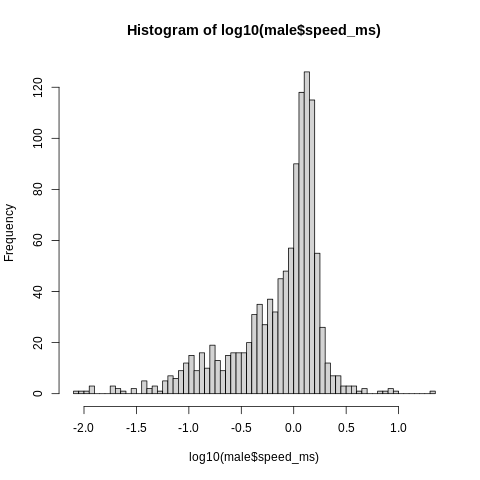

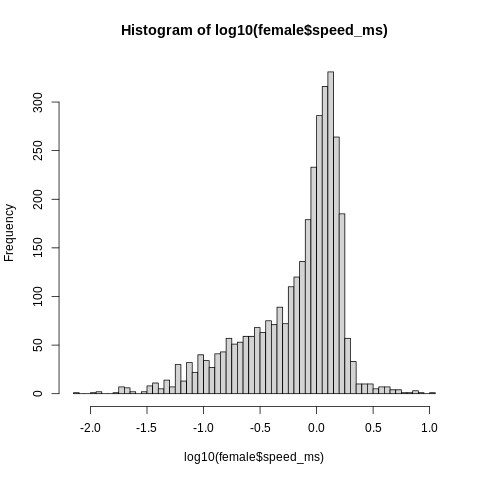

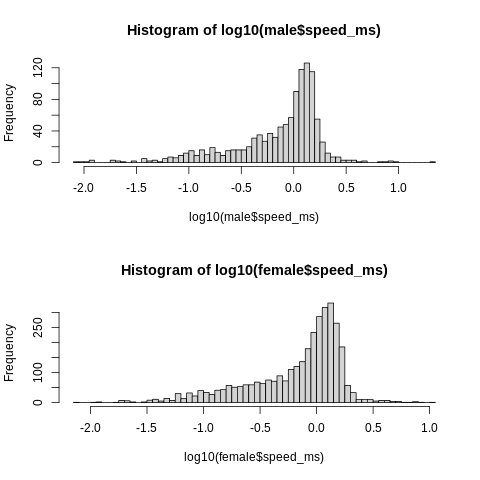

In [ ]:
%%R

# Log-transformed

hist(log10(male$speed_ms), 100)
hist(log10(female$speed_ms), 100)
par(mfrow=c(2, 1))
hist(log10(male$speed_ms), 100)
hist(log10(female$speed_ms), 100)


We can also do these kind of plots in ggplot to make them a bit fancier...

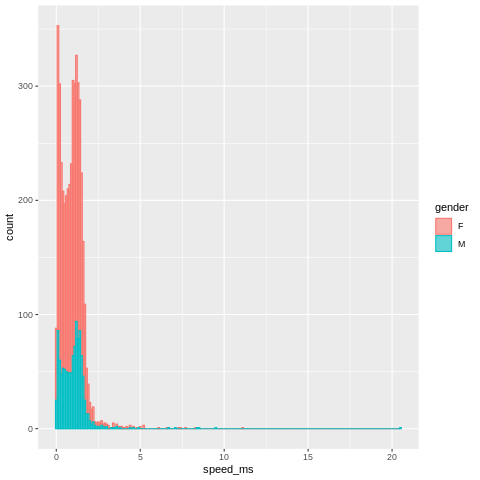

In [ ]:
%%R

# Use ggplot to do some fancy plots
m <- ggplot(dat, aes(x=speed_ms, group=gender, color=gender, fill=gender)) + 
geom_histogram(binwidth = 0.1, alpha=0.6)
m

Again, log-transformaing can make things easier to see... and it's easy to get the log-axis labels clearer in ggplot

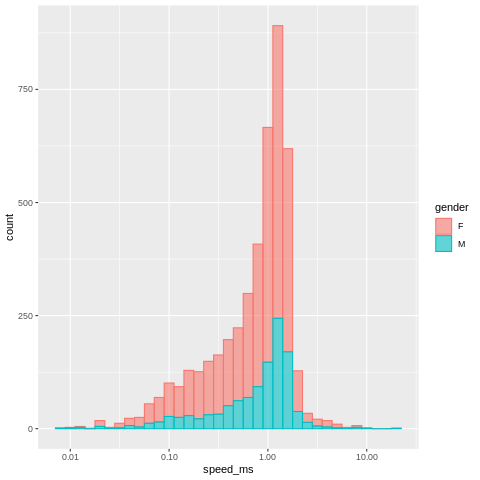

In [ ]:
%%R 

# Might be useful to log transform data
# **Note - where did the zeros go? **
m <- ggplot(dat, aes(x=speed_ms, group=gender, color=gender, fill=gender)) + 
geom_histogram(binwidth = 0.1, alpha=0.6) + 
scale_x_log10()
m

# Speeds per individual

Get some summary stats for each individual

In [ ]:
%%R 

# Get mean speed for each team
sort(tapply(dat$speed_ms, dat$name, mean, na.rm=T))

# Who's in the data
individuals = unique(dat$name)
print(individuals)
n <- subset(dat, name == "AS")
k <- subset(dat, name == "BH")

# Get their speed
n_speed <- n$speed_ms
k_speed <- k$speed_ms

# Get mean speed
print(mean(n_speed, na.rm=T))
print(mean(k_speed, na.rm=T))

 [1] "AS"  "BH"  "BAH" "BR"  "ES"  "FZ"  "SBL" "SR"  "TA"  "wbc" "YJC"
[1] 1.246135
[1] 0.9923826


Use ggplot to do fancy speed plots for each person...

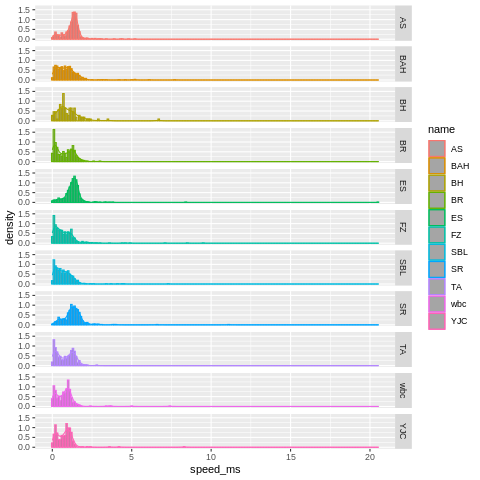

In [ ]:
%%R
# Use ggplot to do some fancy plots for each person
m <- ggplot(dat, aes(x=speed_ms, color=name))
m <- m + geom_histogram(aes(y=..density..), binwidth=0.1, position="identity", alpha=0.5) + 
    geom_density(alpha=0.6) + 
    facet_grid(name ~ .)
m


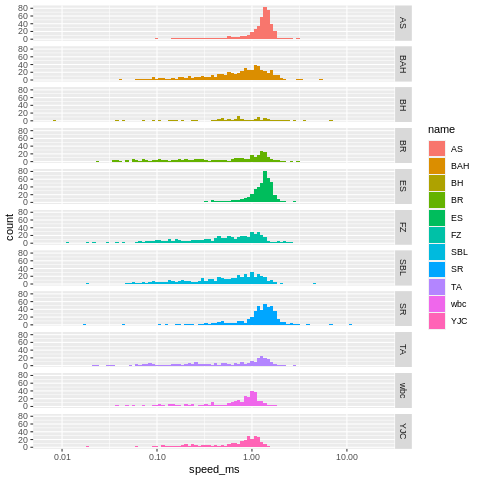

In [ ]:
%%R

# log-transform...
m <- ggplot(dat, aes(x=speed_ms, fill=name)) + 
  geom_histogram(bins = 100) + 
  scale_x_log10() + 
  facet_grid(name ~ .)
m


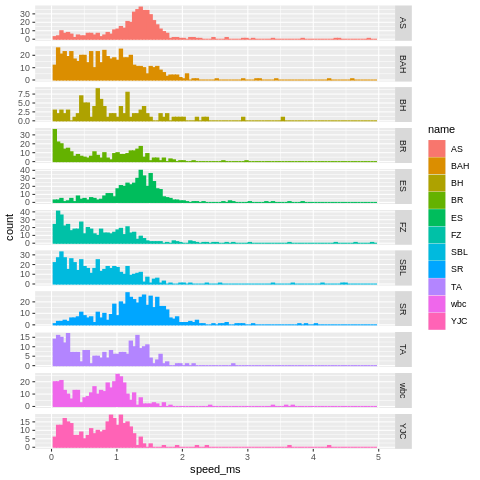

In [ ]:
%%R

# Could also remove all the zeros
dat_non_stationary <- subset(dat, speed_ms > 0)

# Same again with only moving data
m <- ggplot(dat_non_stationary, aes(x=speed_ms, color=name, fill=name))
m <- m + geom_histogram(bins = 100) + 
  facet_grid(name ~ ., scales='free') +
  scale_x_continuous(limits=c(0,5)) 
m

What was the mean speed for each individual? (Now working with only moving data)

In [ ]:
%%R

# What was the mean speed for each individual? (Now working with only moving data)
library(dplyr)

# Here we use dplyr to group the data by name and calculate some summary stats for each individual/name
summary_dat <- dat_non_stationary %>%
                group_by(name) %>%
                summarise(
                  N = length(speed_ms),
                  mean_speed = mean(speed_ms, na.rm = T),
                  median_speed = median(speed_ms, na.rm = T),
                  mean_distance = mean(distance_km, na.rm = T)
                ) %>%
                arrange(-mean_speed)

summary_dat

# A tibble: 11 × 5
   name      N mean_speed median_speed mean_distance
   <chr> <int>      <dbl>        <dbl>         <dbl>
 1 ES      486      1.32         1.33            NaN
 2 SR      490      1.30         1.28            NaN
 3 AS      491      1.25         1.32            NaN
 4 BH      108      0.992        0.785           NaN
 5 BAH     588      0.896        0.819           NaN
 6 TA      272      0.808        0.826           NaN
 7 YJC     314      0.771        0.800           NaN
 8 wbc     379      0.765        0.785           NaN
 9 FZ      530      0.743        0.580           NaN
10 BR      329      0.743        0.679           NaN
11 SBL     517      0.713        0.621           NaN


Plot who's the fastest

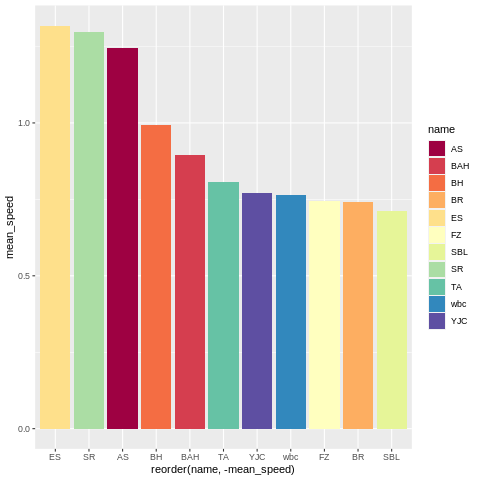

In [ ]:
%%R

ggplot(summary_dat, aes(x=reorder(name, -mean_speed), y=mean_speed, fill=name)) + 
geom_bar(stat="identity") + 
scale_fill_brewer(palette = "Spectral")


# Interactive maps

Install some python packages to make interactive maps

In [ ]:
!pip install -q ipyleaflet

from google.colab import output
output.enable_custom_widget_manager()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00


In [ ]:
!pip install geopandas

Interactive map showing tracks

In [ ]:
from ipyleaflet import Map, GeoJSON, GeoData
import geopandas, pandas as pd, numpy as np

m = Map(center=(51.5354, -0.15), zoom=15, basemap= basemaps.Esri.WorldTopoMap)

# Load tracking data
df = pd.read_csv("/content/Mres_TrackingData_2022.csv")

# Convert to geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat))

# Then geodata
geo_data = GeoData(geo_dataframe = gdf,
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 2, 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Tracks')

# Add to map
m.add_layer(geo_data)
m

Map(center=[51.5354, -0.15], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

More complex interactive map showing tracks colored by individual

In [ ]:
from ipyleaflet import Map, GeoJSON, GeoData, LayersControl
import geopandas, pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex 

# Load tracking data
df = pd.read_csv("/content/Mres_TrackingData_2022.csv")

m = Map(center=(51.5354, -0.15), zoom=15)

df_grouped = df.groupby('name')

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(df_grouped.groups)))
colors[1]

c = 0
for group_name, df_group in df_grouped:
    print('\nAdding data for {}, color {}'.format(group_name, rgb2hex(colors[c])))

    # Convert to geopandas
    gdf = geopandas.GeoDataFrame(
        df_group, geometry=geopandas.points_from_xy(df_group.long, df_group.lat))

    # Then geodata
    geo_data = GeoData(geo_dataframe = gdf,
        point_style={'radius': 2, 'fillOpacity': 0.4, 'color': rgb2hex(colors[c]), 'weight': 3},
        name = group_name)
    c = c + 1

    # Add to map
    m.add_layer(geo_data)


m.add_control(LayersControl())
m.layout.height="700px"

m

# Other problems

Some problems:
* Who is the fastest 'group'
* Are altitude measurements reliable?
* How would you calculate 'residency time' (clue.. think about the space as a grid)
* Data for multiple sessions are avialable here: https://www.dropbox.com/sh/kokqn4a60tpucaa/AACa6zhKAC_Zu_P7qUhZkKCMa?dl=0 (which individual was fastest across all sessions)
